In [24]:
import pandas as pd
import openpyxl
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = 'dataset/PRITAM SIR NEW DATA.xlsx'
# load the dataset
# create the pivot table
df = pd.read_excel(data, sheet_name='Sheet1')
# df_s2 = pd.read_excel(data, sheet_name='Sheet2')


In [26]:
df.columns

Index(['SL. NO', 'Reg No/ Unit', 'Patient Name.', 'Age In Year', 'Gender',
       'Religion', 'Dengue Serology', 'Water intake', 'Stool for Occult Blood',
       'Patient Platelate Count in Control Group Suffering From Dengue.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'White Cell Count in Control Group Suffering From Dengue.',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23',
       'PVC in Control group (with Dengue fever) (Measure in precantage)',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [27]:
# rename Dat 0 to Day 0 in the row in df.iloc[0]
df.iloc[0] = df.iloc[0].str.replace('Dat 0', 'Day 0')
df.head()

,SL. NO,Reg No/ Unit,Patient Name.,Age In Year,Gender,Religion,Dengue Serology,Water intake,Stool for Occult Blood,Patient Platelate Count in Control Group Suffering From Dengue.,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,PVC in Control group (with Dengue fever) (Measure in precantage),Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Day 0,...,Day 4,Day 5,Day 7,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 7
1,1.0,ERM / 37750 DR. DP. SINGH,ARISH SINGH,24 YR.,M,HINDU,NS1+,As Per Need,Nil,65000/CUMM,...,27500/CUMM,3750/CUMM,6800/CUMM,42.6,42.8,43.1,42.8,43.8,43.2,43.6
2,2.0,ERM / 37855 Dr. A. KUMAR,UMESH KR.,50YR.,M,HINDU,NS1+,As Per Need,Nil,110000/CUMM,...,3200/CUMM,4850/CUMM,7250/CUMM,39.6,39.8,401,40.6,39.9,40.9,41.2
3,3.0,ERM / 37809 Dr. A.K. VNIT,SANTOSH KR.,35YR.,M,HINDU,NS1+,As Per Need,Nil,98050/CUMM,...,1935/CUMM,3670/CUMM,5670/CUMM,43.4,43.6,44.1,44.3,43.9,44.8,44.9
4,4.0,ERM / 37712 Dr. D. P GUPTA,SUBNUM NOOR,26 YR.,M,MUSLIM,NS1+,As Per Need,Nil,46850/CUMM,...,4670/CUMM,5250/CUMM,6710/CUMM,49.1,49.2,49.6,49.2,49.5,49.5,49.6


In [28]:
df = df.rename(columns={
    'Reg No/ Unit': 'Reg_No_Unit',
    'Patient Name.': 'Patient_Name',
    'Age In Year': 'Age',
    'Dengue Serology': 'Dengue_Serology',
    'Water intake': 'Water_Intake',
    'Stool for Occult Blood': 'Stool_for_Occult_Blood',
    'PVC in Control group (with Dengue fever) (Measure in precantage)': 'PVC_Control',
    'White Cell Count in Control Group Suffering From Dengue.' : 'WBC_Control',
    'Patient Platelate Count in Control Group Suffering From Dengue.' : 'Platelet_Control'
})



# drop the first column
df = df.drop(df.columns[0], axis=1)

df.head()

,Reg_No_Unit,Patient_Name,Age,Gender,Religion,Dengue_Serology,Water_Intake,Stool_for_Occult_Blood,Platelet_Control,Unnamed: 10,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,PVC_Control,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Day 0,Day 1,...,Day 4,Day 5,Day 7,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 7
1,ERM / 37750 DR. DP. SINGH,ARISH SINGH,24 YR.,M,HINDU,NS1+,As Per Need,Nil,65000/CUMM,46000/CUMM,...,27500/CUMM,3750/CUMM,6800/CUMM,42.6,42.8,43.1,42.8,43.8,43.2,43.6
2,ERM / 37855 Dr. A. KUMAR,UMESH KR.,50YR.,M,HINDU,NS1+,As Per Need,Nil,110000/CUMM,88000/CUMM,...,3200/CUMM,4850/CUMM,7250/CUMM,39.6,39.8,401,40.6,39.9,40.9,41.2
3,ERM / 37809 Dr. A.K. VNIT,SANTOSH KR.,35YR.,M,HINDU,NS1+,As Per Need,Nil,98050/CUMM,72573/CUMM,...,1935/CUMM,3670/CUMM,5670/CUMM,43.4,43.6,44.1,44.3,43.9,44.8,44.9
4,ERM / 37712 Dr. D. P GUPTA,SUBNUM NOOR,26 YR.,M,MUSLIM,NS1+,As Per Need,Nil,46850/CUMM,320151/CUMM,...,4670/CUMM,5250/CUMM,6710/CUMM,49.1,49.2,49.6,49.2,49.5,49.5,49.6


In [29]:
num_day = [0, 1, 2, 3, 4, 5, 7]
for i in df.iloc[0]:
    if not pd.isna(i):
        # check each num_day in the df.iloc[0] row
        for j in num_day:
            if 'Day {}'.format(j) in i:
                # merge the Platelet_Control, WBC_Control, PVC_Control with the df.iloc[0] row
                df['Platelet_Control_Day{}'.format(j)] = df['Platelet_Control']
                df['WBC_Control_Day{}'.format(j)] = df['WBC_Control']
                df['PVC_Control_Day{}'.format(j)] = df['PVC_Control']

df.head()


,Reg_No_Unit,Patient_Name,Age,Gender,Religion,Dengue_Serology,Water_Intake,Stool_for_Occult_Blood,Platelet_Control,Unnamed: 10,...,PVC_Control_Day3,Platelet_Control_Day4,WBC_Control_Day4,PVC_Control_Day4,Platelet_Control_Day5,WBC_Control_Day5,PVC_Control_Day5,Platelet_Control_Day7,WBC_Control_Day7,PVC_Control_Day7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Day 0,Day 1,...,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0
1,ERM / 37750 DR. DP. SINGH,ARISH SINGH,24 YR.,M,HINDU,NS1+,As Per Need,Nil,65000/CUMM,46000/CUMM,...,42.6,65000/CUMM,35000/CUMM,42.6,65000/CUMM,35000/CUMM,42.6,65000/CUMM,35000/CUMM,42.6
2,ERM / 37855 Dr. A. KUMAR,UMESH KR.,50YR.,M,HINDU,NS1+,As Per Need,Nil,110000/CUMM,88000/CUMM,...,39.6,110000/CUMM,2100/CUMM,39.6,110000/CUMM,2100/CUMM,39.6,110000/CUMM,2100/CUMM,39.6
3,ERM / 37809 Dr. A.K. VNIT,SANTOSH KR.,35YR.,M,HINDU,NS1+,As Per Need,Nil,98050/CUMM,72573/CUMM,...,43.4,98050/CUMM,4570/CUMM,43.4,98050/CUMM,4570/CUMM,43.4,98050/CUMM,4570/CUMM,43.4
4,ERM / 37712 Dr. D. P GUPTA,SUBNUM NOOR,26 YR.,M,MUSLIM,NS1+,As Per Need,Nil,46850/CUMM,320151/CUMM,...,49.1,46850/CUMM,8835/CUMM,49.1,46850/CUMM,8835/CUMM,49.1,46850/CUMM,8835/CUMM,49.1


In [30]:
[df.columns]

[Index(['Reg_No_Unit', 'Patient_Name', 'Age', 'Gender', 'Religion',
        'Dengue_Serology', 'Water_Intake', 'Stool_for_Occult_Blood',
        'Platelet_Control', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
        'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
        'WBC_Control', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
        'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'PVC_Control',
        'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
        'Unnamed: 29', 'Unnamed: 30', 'Platelet_Control_Day0',
        'WBC_Control_Day0', 'PVC_Control_Day0', 'Platelet_Control_Day1',
        'WBC_Control_Day1', 'PVC_Control_Day1', 'Platelet_Control_Day2',
        'WBC_Control_Day2', 'PVC_Control_Day2', 'Platelet_Control_Day3',
        'WBC_Control_Day3', 'PVC_Control_Day3', 'Platelet_Control_Day4',
        'WBC_Control_Day4', 'PVC_Control_Day4', 'Platelet_Control_Day5',
        'WBC_Control_Day5', 'PVC_Control_Day5', 'Platelet_Control_Day7',
        'WBC_Cont

In [31]:

no_drop = ['Reg_No_Unit', 'Patient_Name', 'Age', 'Gender', 'Religion', 
'Dengue_Serology', 'Water_Intake', 'Stool_for_Occult_Blood', 'Platelet_Control_Day{num_day}', 
'WBC_Control_Day{num_day}', 'PVC_Control_Day{num_day}']

# drop all the columns except no_drop list
num_day = [0, 1, 2, 3, 4, 5, 7]
for i in df.columns:
    if i not in no_drop:
        for j in num_day:
            if 'Day {}'.format(j) in i:
                df = df.drop(i, axis=1)
df.head()



,Reg_No_Unit,Patient_Name,Age,Gender,Religion,Dengue_Serology,Water_Intake,Stool_for_Occult_Blood,Platelet_Control,Unnamed: 10,...,PVC_Control_Day3,Platelet_Control_Day4,WBC_Control_Day4,PVC_Control_Day4,Platelet_Control_Day5,WBC_Control_Day5,PVC_Control_Day5,Platelet_Control_Day7,WBC_Control_Day7,PVC_Control_Day7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Day 0,Day 1,...,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0,Day 0
1,ERM / 37750 DR. DP. SINGH,ARISH SINGH,24 YR.,M,HINDU,NS1+,As Per Need,Nil,65000/CUMM,46000/CUMM,...,42.6,65000/CUMM,35000/CUMM,42.6,65000/CUMM,35000/CUMM,42.6,65000/CUMM,35000/CUMM,42.6
2,ERM / 37855 Dr. A. KUMAR,UMESH KR.,50YR.,M,HINDU,NS1+,As Per Need,Nil,110000/CUMM,88000/CUMM,...,39.6,110000/CUMM,2100/CUMM,39.6,110000/CUMM,2100/CUMM,39.6,110000/CUMM,2100/CUMM,39.6
3,ERM / 37809 Dr. A.K. VNIT,SANTOSH KR.,35YR.,M,HINDU,NS1+,As Per Need,Nil,98050/CUMM,72573/CUMM,...,43.4,98050/CUMM,4570/CUMM,43.4,98050/CUMM,4570/CUMM,43.4,98050/CUMM,4570/CUMM,43.4
4,ERM / 37712 Dr. D. P GUPTA,SUBNUM NOOR,26 YR.,M,MUSLIM,NS1+,As Per Need,Nil,46850/CUMM,320151/CUMM,...,49.1,46850/CUMM,8835/CUMM,49.1,46850/CUMM,8835/CUMM,49.1,46850/CUMM,8835/CUMM,49.1


In [32]:
# remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# remove the first row
df = df.iloc[1:]

drop_col = ['Platelet_Control', 'WBC_Control', 'PVC_Control']
df.drop(drop_col, axis=1, inplace=True)

# remove 'CUMM' from all columns
df = df.replace(to_replace=['/CUMM'], value='', regex=True)

# remove 'M' Platelet_Control_Day{num_day}	WBC_Control_Day{num_day}

In [33]:
# remove YR, . from the Age column
df['Age'] = df['Age'].str.replace('YR', '')
df['Age'] = df['Age'].str.replace('.', '')
# convert the Age column to int
df['Age'] = df['Age'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15716\864421159.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Age'] = df['Age'].str.replace('.', '')


In [34]:
# remove 'ERM /' from Reg_No_Unit
df['Reg_No_Unit'] = df['Reg_No_Unit'].apply(lambda x: x.replace('ERM / ', ''))

# separate Reg_No_Unit and Dr name
df[['Reg_No_Unit', 'Dr_Name']] = df['Reg_No_Unit'].str.split(' ', 1, expand=True)

# create new column with Dr name
df['Dr_Name'] = df['Dr_Name'].apply(lambda x: x.replace('.', ' '))

df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15716\3780753762.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Reg_No_Unit', 'Dr_Name']] = df['Reg_No_Unit'].str.split(' ', 1, expand=True)


,Reg_No_Unit,Patient_Name,Age,Gender,Religion,Dengue_Serology,Water_Intake,Stool_for_Occult_Blood,Platelet_Control_Day0,WBC_Control_Day0,...,Platelet_Control_Day4,WBC_Control_Day4,PVC_Control_Day4,Platelet_Control_Day5,WBC_Control_Day5,PVC_Control_Day5,Platelet_Control_Day7,WBC_Control_Day7,PVC_Control_Day7,Dr_Name
1,37750,ARISH SINGH,24,M,HINDU,NS1+,As Per Need,Nil,65000,35000,...,65000,35000,42.6,65000,35000,42.6,65000,35000,42.6,DR DP SINGH
2,37855,UMESH KR.,50,M,HINDU,NS1+,As Per Need,Nil,110000,2100,...,110000,2100,39.6,110000,2100,39.6,110000,2100,39.6,Dr A KUMAR
3,37809,SANTOSH KR.,35,M,HINDU,NS1+,As Per Need,Nil,98050,4570,...,98050,4570,43.4,98050,4570,43.4,98050,4570,43.4,Dr A K VNIT
4,37712,SUBNUM NOOR,26,M,MUSLIM,NS1+,As Per Need,Nil,46850,8835,...,46850,8835,49.1,46850,8835,49.1,46850,8835,49.1,Dr D P GUPTA
5,37871,INDU DEVI,48,F,HINDU,NS1+,As Per Need,Nil,85000,1800,...,85000,1800,48.3,85000,1800,48.3,85000,1800,48.3,Dr R KUMAR


In [35]:
# Summary statistics
df.describe()

,Age,PVC_Control_Day0,PVC_Control_Day1,PVC_Control_Day2,PVC_Control_Day3,PVC_Control_Day4,PVC_Control_Day5,PVC_Control_Day7
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,30.500000,45.306000,45.306000,45.306000,45.306000,45.306000,45.306000,45.306000
std,11.908238,4.357232,4.357232,4.357232,4.357232,4.357232,4.357232,4.357232
min,15.000000,36.300000,36.300000,36.300000,36.300000,36.300000,36.300000,36.300000
25%,20.500000,41.475000,41.475000,41.475000,41.475000,41.475000,41.475000,41.475000
50%,28.000000,46.900000,46.900000,46.900000,46.900000,46.900000,46.900000,46.900000
75%,35.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
max,62.000000,51.200000,51.200000,51.200000,51.200000,51.200000,51.200000,51.200000


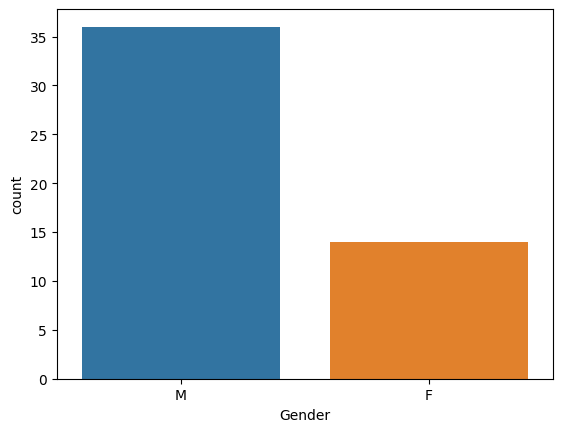

C:\Users\DELL\AppData\Local\Temp\ipykernel_15716\1126321063.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Age_analysis = sns.distplot(df['Age'], color='red')


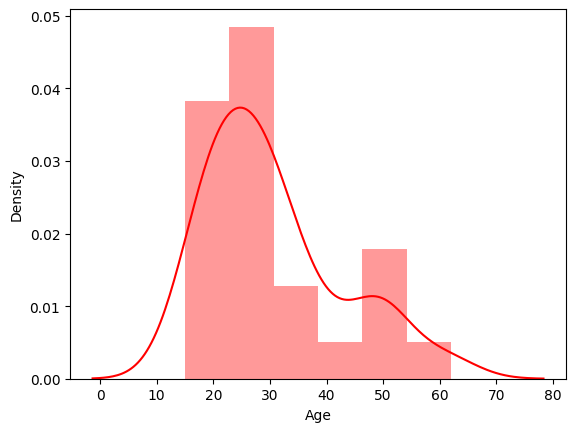

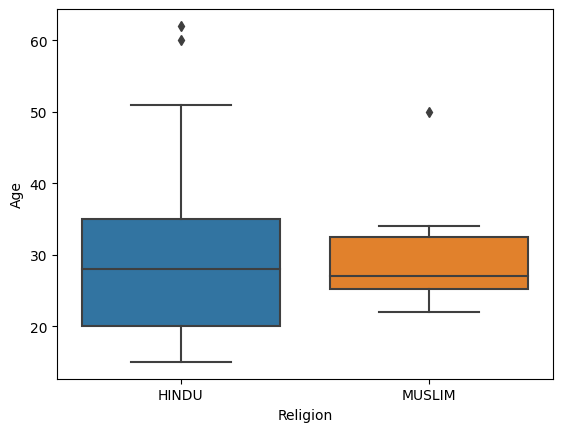

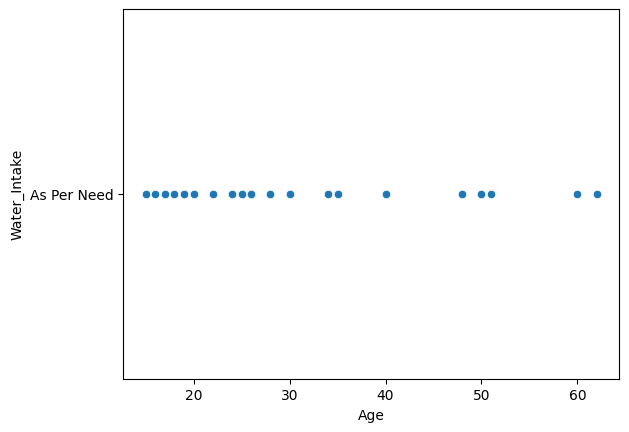

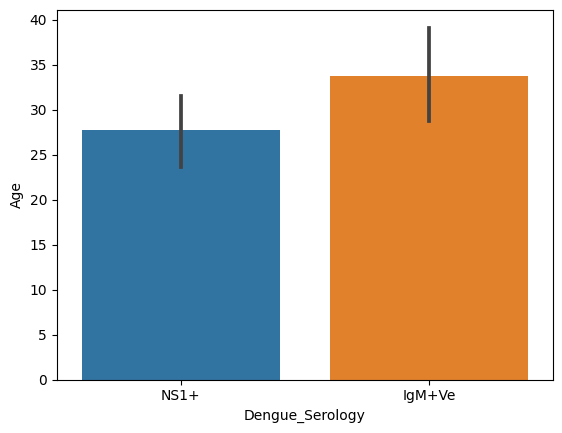

C:\Users\DELL\AppData\Local\Temp\ipykernel_15716\1126321063.py:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


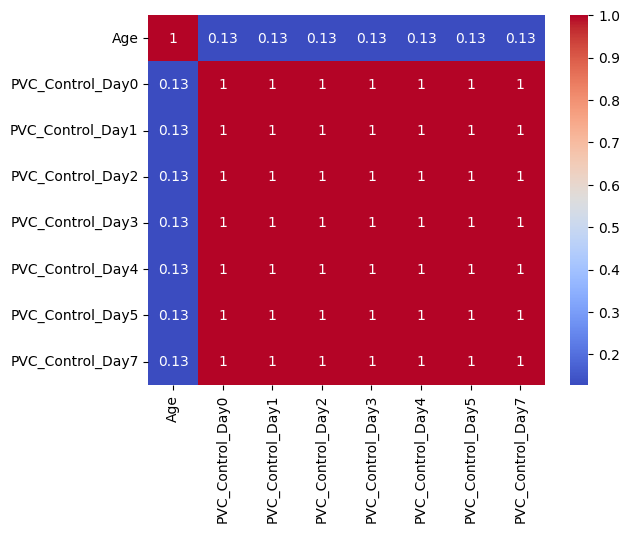

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

# Univariate analysis
Univariate_analysis = sns.countplot(x='Gender', data=df)
plt.savefig('plots/Univariate_analysis.png')
plt.show()

# age analysis
Age_analysis = sns.distplot(df['Age'], color='red')
plt.savefig('plots/Age_analysis.png')
plt.show()

# Religion analysis
Religion_analysis = sns.boxplot(x='Religion', y='Age', data=df)
plt.savefig('plots/Religion_analysis.png')
plt.show()

# Bivariate analysis
Bivariate_analysis = sns.scatterplot(x='Age', y='Water_Intake', data=df)
plt.savefig('plots/Bivariate_analysis.png')
plt.show()

# Dengue_Serology analysis
Dengue_Serology = sns.barplot(x='Dengue_Serology', y='Age', data=df)
plt.savefig('plots/Dengue_Serology.png')
plt.show()


# Correlation analysis
corr_matrix = df.corr()
# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('plots/Heatmap.png')
plt.show()






In [37]:
# plot all the plots in one figure using subplots and save the figure as image file using plt.savefig() method
plt.savefig('plots/plot.png')


<Figure size 640x480 with 0 Axes>

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# encoding categorical variable
# label encoding
le = LabelEncoder()

# religion
df['Religion'] = le.fit_transform(df['Religion'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Dengue_Serology'] = le.fit_transform(df['Dengue_Serology'])
df['Water_Intake'] = le.fit_transform(df['Water_Intake'])
df['Stool_for_Occult_Blood'] = le.fit_transform(df['Stool_for_Occult_Blood'])
df['Dr_Name'] = le.fit_transform(df['Dr_Name'])
df['Patient_Name'] = le.fit_transform(df['Patient_Name'])

# Remove unnecessary columns
# df.drop(['Dr_Name', 'Patient_Name'], axis=1, inplace=True)

df.head()


,Reg_No_Unit,Patient_Name,Age,Gender,Religion,Dengue_Serology,Water_Intake,Stool_for_Occult_Blood,Platelet_Control_Day0,WBC_Control_Day0,...,Platelet_Control_Day4,WBC_Control_Day4,PVC_Control_Day4,Platelet_Control_Day5,WBC_Control_Day5,PVC_Control_Day5,Platelet_Control_Day7,WBC_Control_Day7,PVC_Control_Day7,Dr_Name
1,37750,6,24,1,0,1,0,0,65000,35000,...,65000,35000,42.6,65000,35000,42.6,65000,35000,42.6,0
2,37855,45,50,1,0,1,0,0,110000,2100,...,110000,2100,39.6,110000,2100,39.6,110000,2100,39.6,2
3,37809,39,35,1,0,1,0,0,98050,4570,...,98050,4570,43.4,98050,4570,43.4,98050,4570,43.4,3
4,37712,41,26,1,1,1,0,0,46850,8835,...,46850,8835,49.1,46850,8835,49.1,46850,8835,49.1,5
5,37871,18,48,0,0,1,0,0,85000,1800,...,85000,1800,48.3,85000,1800,48.3,85000,1800,48.3,14


In [39]:
# remove M from Platelet_Control_Day{num_day}	WBC_Control_Day{num_day}
num_day = [0, 1, 2, 3, 4, 5, 7]
# remove M from Platelet_Control_Day{num_day}	WBC_Control_Day{num_day}
for i in df.columns:
    for j in num_day:
        if 'Platelet_Control_Day{}'.format(j) in i:
            df[i] = df[i].apply(lambda x: x.replace('M', ''))
        if 'WBC_Control_Day{}'.format(j) in i:
            df[i] = df[i].apply(lambda x: x.replace('M', ''))

# df.to_csv('dataset/ML_PRITAM SIR NEW DATA.csv', index=False)

In [55]:
# convert the df to perform ML
df = df.astype(float)

print(df)

[[ 0.18920196 -1.31318124 -0.55138231 ...  5.90881006 -0.62734153
  -2.19511651]
 [ 0.20727825  1.56078443  1.65414693 ... -0.95261139 -1.32284212
  -1.74895462]
 [ 0.19935911  1.11863587  0.38172621 ... -0.4374834  -0.44187471
  -1.52587367]
 ...
 [ 0.3176297   1.41340158  0.38172621 ...  0.03801937 -1.43875888
  -1.74895462]
 [ 0.32313867  0.52910445 -0.04241402 ...  0.09015783  0.69410959
  -1.74895462]
 [ 0.39613245  0.97125301  0.38172621 ...  0.55940397  0.87957641
   1.15109768]]


In [44]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(40, 30)
(10, 30)
(40,)
(10,)


In [50]:
# import the libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# import the models
from sklearn.linear_model import LogisticRegression
# Kfold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


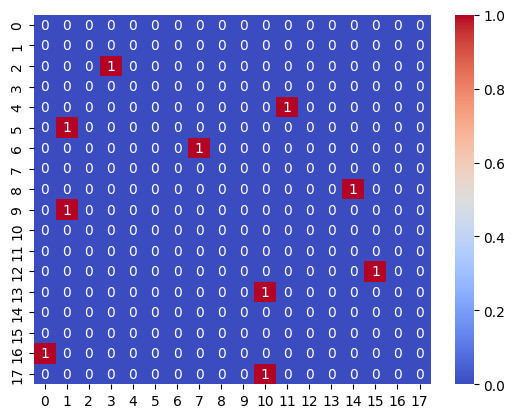

0.0
              precision    recall  f1-score   support

       37712       0.00      0.00      0.00       0.0
       37766       0.00      0.00      0.00       0.0
       37809       0.00      0.00      0.00       1.0
       37855       0.00      0.00      0.00       0.0
       37871       0.00      0.00      0.00       1.0
       37952       0.00      0.00      0.00       1.0
       38007       0.00      0.00      0.00       1.0
       38044       0.00      0.00      0.00       0.0
       38086       0.00      0.00      0.00       1.0
       38115       0.00      0.00      0.00       1.0
       38124       0.00      0.00      0.00       0.0
       38140       0.00      0.00      0.00       0.0
       38256       0.00      0.00      0.00       1.0
       38257       0.00      0.00      0.00       1.0
       38343       0.00      0.00      0.00       0.0
       38348       0.00      0.00      0.00       0.0
       38370       0.00      0.00      0.00       1.0
       38513       0.00

c:\Users\DELL\anaconda3\envs\pack\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\envs\pack\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\envs\pack\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\envs\pack\li

In [53]:
# show graphically
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# accuracy score
print(accuracy_score(y_test, y_pred))

# classification report
print(classification_report(y_test, y_pred))

